In [10]:
import scipy as sp
import IPython
import numpy as np 
import matplotlib.pyplot as plt

sr, audio = sp.io.wavfile.read('examples/que_es_un_filtro.wav')
if audio.dtype == np.int16:
    audio = audio/32767
elif audio.dtype == np.int8:
    audio = audio/127-1

audio = audio.T # fix display.Audio 
IPython.display.Audio(data=audio, rate=sr)

In [3]:
from dispeach.filtering import low_pass_filter
audio_lp = low_pass_filter(audio, 1000, 5, sr)
IPython.display.Audio(data=audio_lp, rate=sr)

In [4]:
def distort(audio: np.ndarray, a: float) -> np.ndarray:
    z = np.pi * a
    s = 1 / np.sin(z)
    b = 1 / a

    audio_distorted = np.zeros_like(audio)
    audio_distorted[audio > b] = 1
    audio_distorted[audio <= b] = np.sin(z * audio[audio <= b]) * s

    return audio_distorted

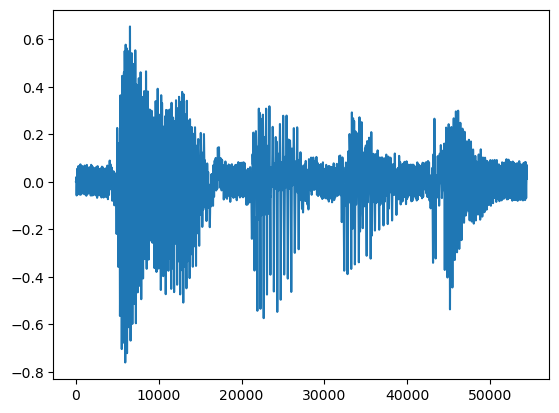

In [12]:
audio_distorted = distort(audio_lp, .1)
plt.plot(audio_distorted[0])
IPython.display.Audio(data=audio_distorted, rate=sr)